# Predicting Loan (defaulting) Statuses
## UCI credit card dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', 60)
plt.rcParams['font.size'] = 24

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

import torch 
from torch import nn
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

In [2]:
credit = pd.read_csv("data/UCI_Credit_Card.csv")

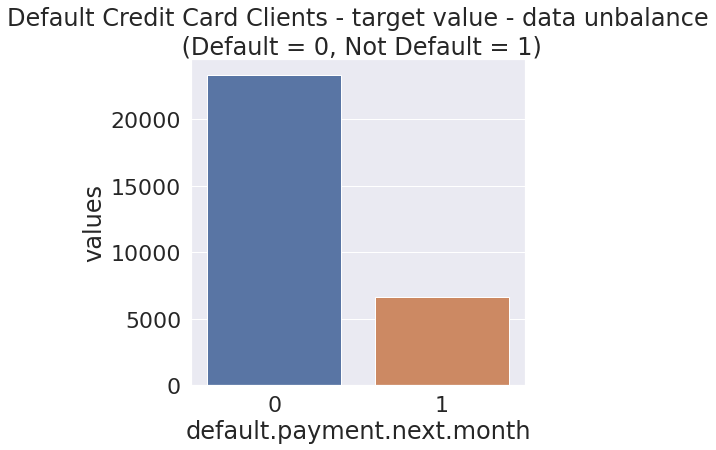

In [3]:
temp = credit["default.payment.next.month"].value_counts()
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks()
plt.savefig('images/imbalance_uci.pdf', bbox_inches='tight')
plt.show()

In [4]:
features = credit.drop(columns='default.payment.next.month')
targets = pd.DataFrame(credit['default.payment.next.month'])
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 24)
(6000, 24)
(24000, 1)
(6000, 1)


In [5]:
# # Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/home/fedebotu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [6]:
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [7]:
# # XGBoost Classification
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('XGBoost Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:08:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:09:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:09:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Classification Performance on the test set: Cross Validation Score = 0.8146


In [8]:
model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  n_estimators = 500,
                                  random_state = 42)

model.fit(X_train, y_train)

[18:09:07] WARNING: ../src/learner.cc:573: 
Parameters: { "loss", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:09:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/fedebotu/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, loss='ls', max_delta_step=0,
              max_depth=5, max_features='auto', min_child_weight=1,
              min_samples_leaf=6, min_samples_split=2, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Model performance on the test set:   MSE = 0.1928.
(array([0.83981517, 0.59677419]), array([0.93065927, 0.36633663]), array([0.88290659, 0.45398773]), array([4687, 1313]))


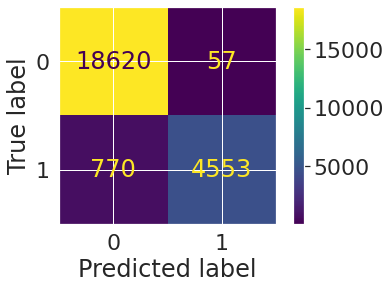

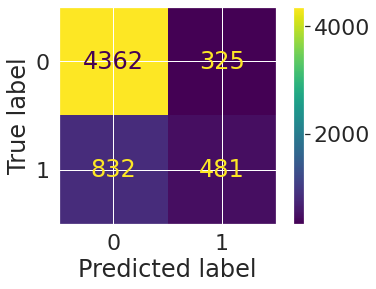

In [9]:
final_pred = model.predict(X_test)
# Function to calculate mean absolute error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)*(y_true - y_pred))

print('Model performance on the test set:   MSE = %0.4f.' % mse(y_test, final_pred))

# The final model does out-perform the baseline model by about less than 1% and at the cost of significantly increased running time (it's about 7 times slower on my machine). 
plot_confusion_matrix(model, X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)
print(precision_recall_fscore_support(y_test, final_pred))

In [19]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(silent = True)

cat.fit(X_train, y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0]
Model performance on the test set:   MSE = 0.1792.
(array([0.84165721, 0.66666667]), array([0.94922125, 0.36252856]), array([0.89220896, 0.4696596 ]), array([4687, 1313]))


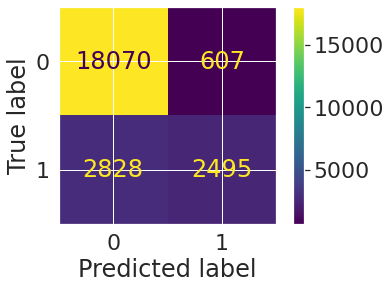

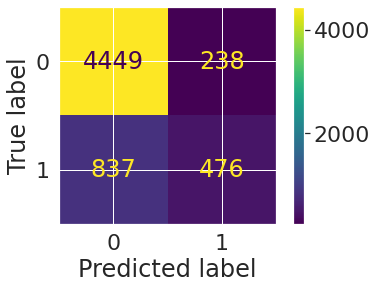

In [10]:
import lightgbm

train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

lgbm = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100,
                       verbose_eval=False)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary


Model performance on the test set:   MSE = 0.1742.


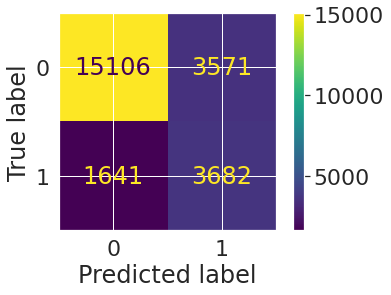

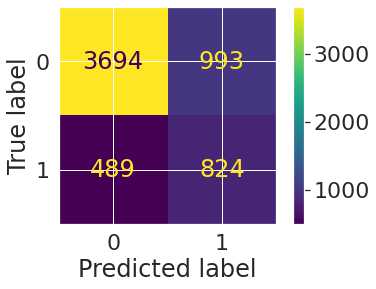

(array([0.88309825, 0.45349477]), array([0.7881374 , 0.62757045]), array([0.83291995, 0.52651757]), array([4687, 1313]))


In [11]:
final_pred = lgbm.predict(X_test)

# Function to calculate mean absolute error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)*(y_true - y_pred))

print('Model performance on the test set:   MSE = %0.4f.' % mse(y_test, final_pred))

# The final model does out-perform the baseline model by about less than 1% and at the cost of significantly increased running time (it's about 7 times slower on my machine). 
cm = confusion_matrix(y_train, np.round(lgbm.predict(X_train)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()
plt.show()

# The final model does out-perform the baseline model by about less than 1% and at the cost of significantly increased running time (it's about 7 times slower on my machine).
cm = confusion_matrix(y_test, np.round(lgbm.predict(X_test)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()
plt.show()

print(precision_recall_fscore_support(y_test, np.round(final_pred)))

## Deep Learning model

In [12]:
train_x = torch.Tensor(X_train)
test_x = torch.Tensor(X_test)
train_y = torch.Tensor(y_train)
test_y = torch.Tensor(y_test)

train_dataset = TensorDataset(train_x, train_y)

In [13]:
import sys; sys.path.append('../')
from src.sampler import ImbalancedDatasetSampler
from pytorch_lightning.loggers import WandbLogger

class LitMLP(pl.LightningModule):
    '''
    MLP model based on Pytorch Lightning
    '''
    def __init__(self, indim, outdim,
                 hdim = 256,
                 batch_size = 256,
                 num_workers = 12):
    
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(indim, hdim),
            nn.ReLU(),
            nn.Linear(hdim, hdim),
            nn.ReLU(),
            nn.Linear(hdim, outdim))   
        # this performs best in classification tasks
        # weight is used for the class imbalances
        self.loss = nn.BCEWithLogitsLoss() 
        self.batch_size = batch_size
        self.num_workers = num_workers
        
    def forward(self, x):
        # in lightning, forward defines the prediction/inference actions
        out = self.model(x)
        return out

    def predict(self, x):
        # This predicts the probability distribution of the outputs
        out = torch.sigmoid(self(x))
        return out
    
    def predict_binary(self, x):
        # This predicts the label by rounding for the output
        out = torch.round(torch.sigmoid(self(x)))
        return out

    def training_step(self, batch, batch_idx):
        x, y = batch
        out = self(x)
        loss = self.loss(out.view(-1), y)        
        self.log('train_loss', loss)
        return loss
    
    def validation_step():
        out = self(test_x)
        val_loss = self.loss(out.view(-1), test_y)
        self.log('val_loss', val_loss)
        return val_loss
    
    def training_epoch_end(self, outputs):
        p, r, f, _ = precision_recall_fscore_support(y_test, torch.round(self.predict(test_x)).detach().numpy())
#         print(y_test, torch.round(self(test_x)).detach().numpy())
        self.log('precision_0', p[0])
        self.log('precision_1', p[1])
        self.log('recall_0', r[0])
        self.log('recall_1', r[1])
        self.log('f1_score_0', f[0])
        self.log('f1_score_1', f[1])
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=.3e-3, weight_decay=1e-5)

        
    def train_dataloader(self):
        return DataLoader(train_dataset, num_workers=self.num_workers,
                        sampler=ImbalancedDatasetSampler(train_dataset),
                        batch_size=self.batch_size)

wandb_logger = WandbLogger()
mlp_lightning = LitMLP(train_x.shape[1], 1)
trainer = pl.Trainer(max_epochs=300, logger=wandb_logger)
trainer.fit(mlp_lightning)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
/home/fedebotu/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  warnings.warn(*args, **kwargs)
/home/fedebotu/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  warnings.warn(*args, **kwargs)
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jujub (use `wandb login --relogin` to force relogin)



  | Name  | Type              | Params
--------------------------------------------
0 | model | Sequential        | 72.4 K
1 | loss  | BCEWithLogitsLoss | 0     
--------------------------------------------
72.4 K    Trainable params
0         Non-trainable params
72.4 K    Total params
0.290     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Model performance on the test set:   MSE = 0.2940.


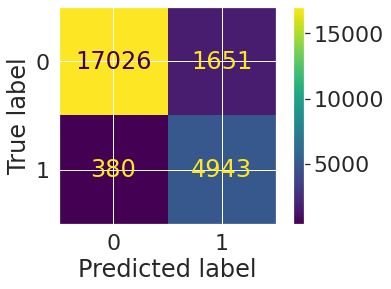

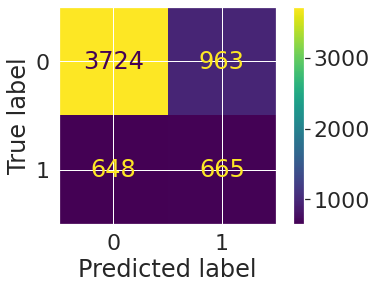

(array([0.85178408, 0.40847666]), array([0.79453808, 0.50647372]), array([0.8221658 , 0.45222713]), array([4687, 1313]))


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

final_pred = mlp_lightning.predict(test_x).detach()

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)*(y_true - y_pred))

print('Model performance on the test set:   MSE = %0.4f.' % mse(y_test, final_pred.numpy()))

cm = confusion_matrix(torch.Tensor(train_y), torch.round(mlp_lightning.predict(train_x).detach()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()
plt.show()

# The final model does out-perform the baseline model by about less than 1% and at the cost of significantly increased running time (it's about 7 times slower on my machine).
cm = confusion_matrix(torch.Tensor(y_test), torch.round(final_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot()
plt.show()

print(precision_recall_fscore_support(torch.Tensor(y_test), torch.round(final_pred)))

In [15]:
import shap

# Mend the data for calculating and plotting Sharpley values
X_train = pd.DataFrame(X_train)
X_train.columns = features.columns
X_train.rename(columns = {'Years in current job_< 1 year':'Years in current job less than a year'}, inplace = True)
X_train.head()

# Load JS visualization code to notebook
shap.initjs()
idx = 14
# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, 
                shap_values[idx,:], 
                X_train.iloc[idx,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


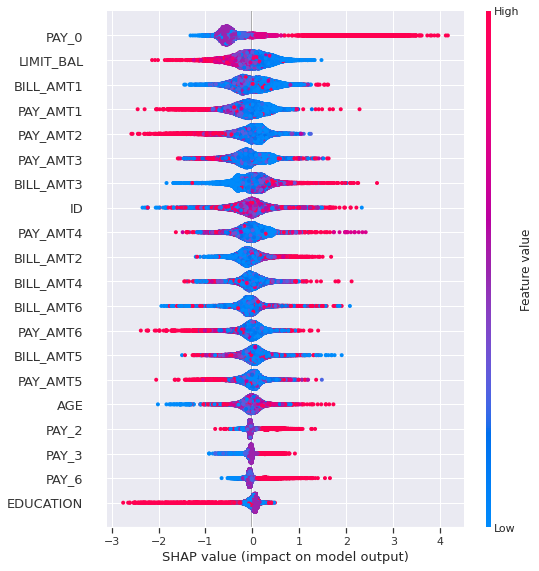

In [18]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig('images/summary_plot_uci.pdf', bbox_inches='tight')